In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ","MLPE"]
error = "MAE"
dateexperiment = "2022_06_22_13_46"

mean_error_methods = {}

for quant_name in quantificators:
    results = pd.read_csv("results/prior/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['p_train'] = results['p_train'].round(2)
    results['p_test'] = results['p_test'].round(2)
    results_mean = results.groupby(['p_train', 'p_test'])['error'].mean().reset_index()
    #convert to matrix form
    results_mean = results_mean.pivot(index='p_train', columns='p_test', values='error')
    mean_error_methods[quant_name]=results_mean.mean().mean()
   
    print("Results for method %s. Mean %s: %f" % (quant_name,error, mean_error_methods[quant_name]))
    cm = sns.light_palette('red', as_cmap=True)
    display(results_mean.style.background_gradient(cmap=cm,low=0,high=1))

Results for method CC. Mean MAE: 0.164950


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.008608,0.093244,0.190188,0.286748,0.382812,0.480616,0.575912,0.673152,0.768596,0.865920,0.952072
0.100000,0.110576,0.070500,0.032096,0.016140,0.045676,0.087808,0.130404,0.168452,0.207776,0.247688,0.286888
0.200000,0.119340,0.084092,0.051480,0.022468,0.021264,0.050984,0.086508,0.120264,0.153884,0.187624,0.222352
0.300000,0.110748,0.080200,0.053488,0.024016,0.012628,0.032644,0.062088,0.091608,0.120568,0.147832,0.178148
0.400000,0.120840,0.091404,0.065496,0.036432,0.016980,0.018400,0.045452,0.074252,0.102564,0.128260,0.156960
0.500000,0.140436,0.110672,0.084300,0.055008,0.031604,0.010852,0.026792,0.055188,0.082548,0.109972,0.138364
0.600000,0.158712,0.127280,0.101524,0.073436,0.048112,0.019640,0.016996,0.039000,0.067676,0.095256,0.123884
0.700000,0.176372,0.145088,0.118460,0.087700,0.063084,0.032472,0.013244,0.028156,0.056024,0.084748,0.113512
0.800000,0.220456,0.184836,0.153756,0.119184,0.091288,0.056736,0.025256,0.020064,0.044116,0.076992,0.109956


Results for method ACC. Mean MAE: 0.115072


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.107896,0.157200,0.242352,0.318500,0.406776,0.498484,0.590412,0.689052,0.787668,0.881168,0.974880
0.100000,0.014784,0.020492,0.022011,0.025205,0.029443,0.033089,0.039701,0.042885,0.045774,0.042625,0.025995
0.200000,0.011989,0.019164,0.022133,0.024331,0.026606,0.028551,0.034506,0.036640,0.042388,0.045273,0.028868
0.300000,0.013206,0.016376,0.018050,0.017173,0.021185,0.019978,0.025842,0.025047,0.024864,0.026831,0.017433
0.400000,0.015769,0.019009,0.019736,0.019222,0.019951,0.018657,0.022762,0.021605,0.021621,0.020758,0.015600
0.500000,0.021208,0.021552,0.024665,0.022894,0.025338,0.022536,0.024234,0.023243,0.022206,0.022525,0.012126
0.600000,0.014283,0.029735,0.028207,0.024679,0.022714,0.020395,0.022594,0.019114,0.018535,0.017184,0.013621
0.700000,0.018445,0.023858,0.025760,0.022457,0.022138,0.020653,0.020593,0.019183,0.017076,0.016305,0.013616
0.800000,0.019962,0.035797,0.037577,0.030869,0.029308,0.026636,0.025530,0.022086,0.019475,0.017985,0.013141


Results for method PCC. Mean MAE: 0.157725


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.456413,0.369386,0.270572,0.171691,0.073059,0.026699,0.125304,0.223881,0.322400,0.421042,0.509770
0.100000,0.242159,0.181148,0.114849,0.047375,0.018185,0.086496,0.152629,0.220351,0.286145,0.352665,0.413721
0.200000,0.137075,0.093840,0.047998,0.012213,0.045664,0.094400,0.140355,0.188910,0.234735,0.280980,0.325364
0.300000,0.104997,0.070201,0.035908,0.009740,0.035139,0.073349,0.108296,0.146404,0.181308,0.217003,0.251526
0.400000,0.134823,0.102350,0.069166,0.034020,0.010959,0.032656,0.066091,0.102747,0.136267,0.169335,0.201752
0.500000,0.170147,0.136702,0.103844,0.069352,0.039132,0.009825,0.029362,0.064167,0.097309,0.131033,0.163476
0.600000,0.209512,0.175277,0.141915,0.107002,0.074891,0.038817,0.012809,0.030809,0.065227,0.100018,0.132832
0.700000,0.262107,0.225599,0.190359,0.151457,0.119107,0.081606,0.043620,0.011947,0.029103,0.066435,0.100347
0.800000,0.331004,0.285377,0.238217,0.189403,0.144513,0.094952,0.047063,0.008027,0.048708,0.097294,0.141429


Results for method PACC. Mean MAE: 0.113714


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.009868,0.097756,0.197760,0.297784,0.397552,0.498524,0.597952,0.697824,0.797588,0.897444,0.987020
0.100000,0.014948,0.020679,0.024350,0.026934,0.034352,0.036558,0.044099,0.047417,0.054162,0.051454,0.021016
0.200000,0.014325,0.018532,0.021323,0.021936,0.022404,0.022790,0.026306,0.028041,0.029774,0.030138,0.022362
0.300000,0.015667,0.019628,0.020332,0.020713,0.023066,0.021784,0.027712,0.028791,0.030331,0.032441,0.019040
0.400000,0.012482,0.020620,0.020892,0.020035,0.019752,0.018088,0.020554,0.021636,0.020625,0.022447,0.013029
0.500000,0.016523,0.023356,0.023676,0.020493,0.023730,0.021138,0.023611,0.022140,0.021627,0.021446,0.015129
0.600000,0.016905,0.025347,0.024215,0.022517,0.021086,0.018299,0.021837,0.019921,0.018696,0.017983,0.012589
0.700000,0.022653,0.032702,0.032229,0.029400,0.028267,0.023676,0.023975,0.022430,0.020005,0.019654,0.013826
0.800000,0.025187,0.039961,0.040263,0.034846,0.031770,0.028446,0.026780,0.023089,0.021230,0.019217,0.014149


Results for method HDy. Mean MAE: 0.037086


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.021861,0.036607,0.049401,0.067826,0.079959,0.093131,0.106921,0.118283,0.126186,0.138711,0.146777
0.100000,0.012072,0.023083,0.028881,0.029743,0.032561,0.035071,0.038012,0.038800,0.037103,0.035960,0.029054
0.200000,0.007771,0.019806,0.023854,0.024670,0.025425,0.025697,0.025899,0.024933,0.022998,0.021216,0.015375
0.300000,0.006064,0.022985,0.024219,0.023904,0.022525,0.021798,0.022630,0.020671,0.019430,0.018602,0.011191
0.400000,0.005901,0.017922,0.018868,0.017883,0.018831,0.016525,0.018865,0.018412,0.017499,0.016792,0.007875
0.500000,0.006891,0.014772,0.018411,0.017747,0.019604,0.016707,0.020194,0.017939,0.016077,0.014541,0.008533
0.600000,0.007370,0.015968,0.018135,0.016688,0.018937,0.017192,0.020917,0.020271,0.021022,0.018545,0.005737
0.700000,0.006872,0.017170,0.020363,0.019438,0.021113,0.019535,0.020776,0.019143,0.019212,0.017160,0.007202
0.800000,0.011611,0.017365,0.020881,0.020143,0.022687,0.021071,0.021693,0.020109,0.021026,0.019018,0.010560


Results for method EMQ. Mean MAE: 0.032629


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.035846,0.059217,0.083569,0.103677,0.127784,0.138766,0.146235,0.146704,0.129375,0.079568,0.009257
0.100000,0.008567,0.014533,0.018600,0.019329,0.024997,0.025336,0.026950,0.026769,0.025123,0.021765,0.013176
0.200000,0.007130,0.013850,0.016842,0.017135,0.020754,0.020161,0.022971,0.021799,0.020930,0.017080,0.011930
0.300000,0.006835,0.013732,0.016155,0.015181,0.017592,0.016024,0.018015,0.016412,0.015222,0.012529,0.010748
0.400000,0.005990,0.013690,0.015373,0.014378,0.016131,0.013588,0.016986,0.016613,0.015638,0.013086,0.007746
0.500000,0.005978,0.015002,0.016054,0.015037,0.016060,0.013828,0.018578,0.017191,0.017036,0.013908,0.007572
0.600000,0.006016,0.017121,0.018510,0.017422,0.016021,0.013203,0.016706,0.015030,0.012984,0.010891,0.007584
0.700000,0.005991,0.017666,0.018467,0.019060,0.016975,0.014108,0.016651,0.015043,0.013325,0.011457,0.008319
0.800000,0.006822,0.022542,0.023377,0.022874,0.019616,0.016988,0.018534,0.015817,0.014236,0.012136,0.008669


Results for method MLPE. Mean MAE: 0.360661


p_test,0.010000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,0.990000
p_train,,,,,,,,,,,
0.010000,0.000000,0.088200,0.188440,0.288680,0.388840,0.490000,0.590000,0.690000,0.790000,0.890000,0.980000
0.100000,0.089800,0.001640,0.098640,0.198880,0.299040,0.400200,0.500200,0.600200,0.700200,0.800200,0.890200
0.200000,0.189860,0.101660,0.001482,0.098820,0.198980,0.300140,0.400140,0.500140,0.600140,0.700140,0.790140
0.300000,0.289880,0.201680,0.101440,0.001282,0.098960,0.200120,0.300120,0.400120,0.500120,0.600120,0.690120
0.400000,0.389920,0.301720,0.201480,0.101240,0.001147,0.100080,0.200080,0.300080,0.400080,0.500080,0.590080
0.500000,0.490000,0.401800,0.301560,0.201320,0.101160,0.000000,0.100000,0.200000,0.300000,0.400000,0.490000
0.600000,0.590000,0.501800,0.401560,0.301320,0.201160,0.100000,0.000000,0.100000,0.200000,0.300000,0.390000
0.700000,0.690000,0.601800,0.501560,0.401320,0.301160,0.200000,0.100000,0.000000,0.100000,0.200000,0.290000
0.800000,0.790000,0.701800,0.601560,0.501320,0.401160,0.300000,0.200000,0.100000,0.000000,0.100000,0.190000


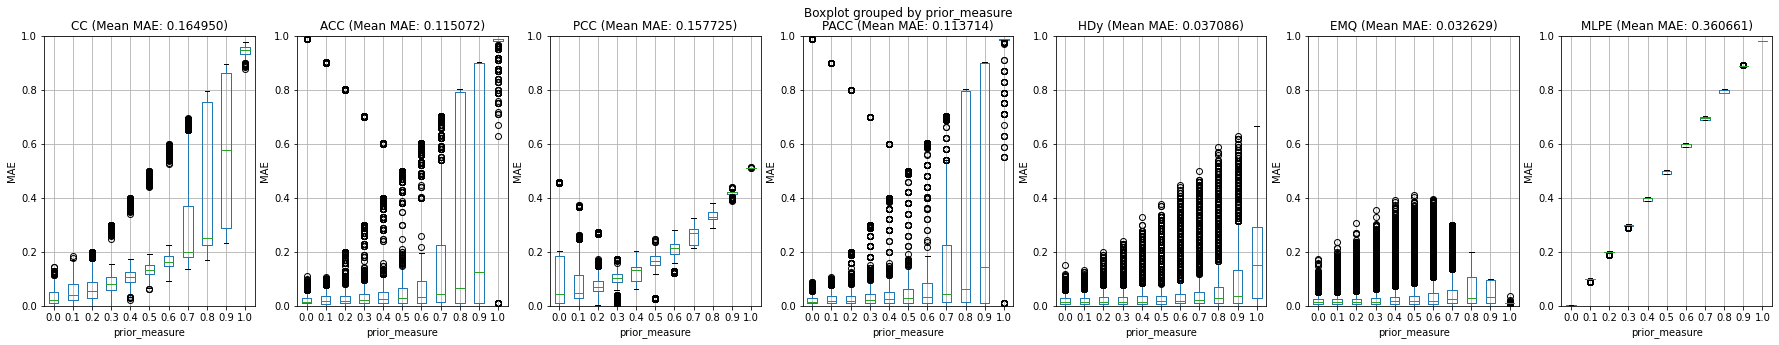

In [2]:
fig, ax = plt.subplots(1,len(quantificators),figsize=(30,5))
pd.set_option('display.max_rows', 500)

for k,quant_name in enumerate(quantificators):
    results = pd.read_csv("results/prior/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['p_train'] = results['p_train'].round(1)
    results['p_test'] = results['p_test'].round(1)
    results['prior_measure'] = abs(results['p_train']-results['p_test'])
    results['prior_measure'] = results['prior_measure'].round(2)
    ax[k].set_ylim(0, 1)
    ax[k].set_ylabel(error)
    ax[k].tick_params(axis='x', rotation=90)
    fig.tight_layout()
    results.boxplot(ax=ax[k],column='error',by='prior_measure')
    ax[k].set_title("%s (Mean %s: %f)"  % (quant_name,error,mean_error_methods[quant_name]))